* Why is it necessary to decompose a time series data?

* It contains some kind of Pattren from them,it help us to underline the pattren
* They are 2-kinds
* 1. Additive Seasonality
* 2. Multiplicative Seasonality

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

data.shape

(144, 1)

In [3]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


## Missing Values

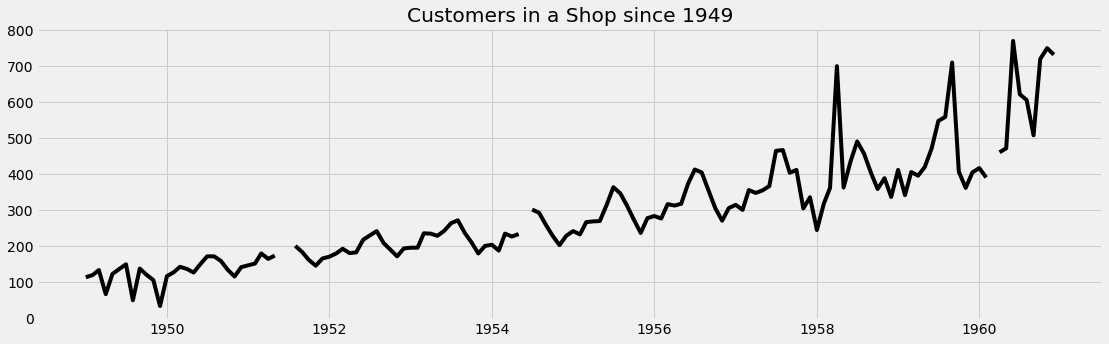

In [4]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

## Linear Interpolation

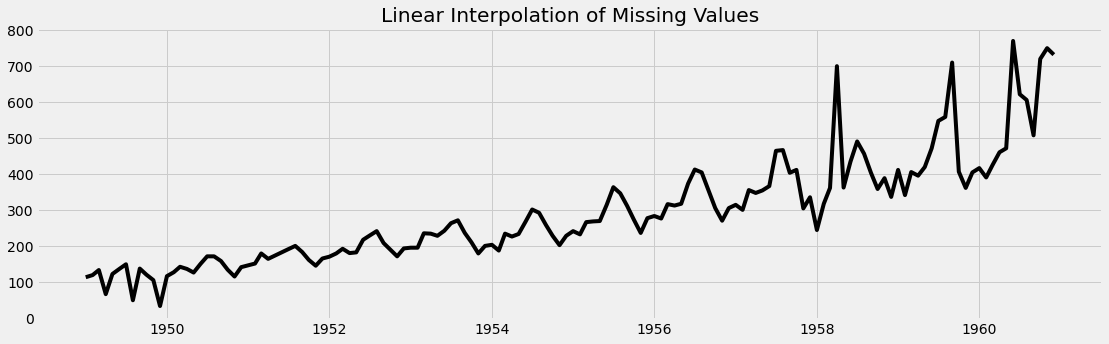

In [5]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Outliers Treatment

In [6]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622

# lets also check the null values again
data.isnull().sum()

Customers           4
Customers_linear    0
dtype: int64

In [7]:
data['Customers_linear']

Date
1949-01-01    114.0
1949-02-01    120.0
1949-03-01    134.0
1949-04-01     67.0
1949-05-01    123.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    622.0
1960-11-01    622.0
1960-12-01    622.0
Name: Customers_linear, Length: 144, dtype: float64

# Time Series Decomposition

In [8]:
import statsmodels.api as sm

## Additive Seasonal Decomposition
* Addititve seasonal decomposition is when we add the individual componenets to get the time series data
* Y(T) = Level + Trend + Seasonality  + Noise

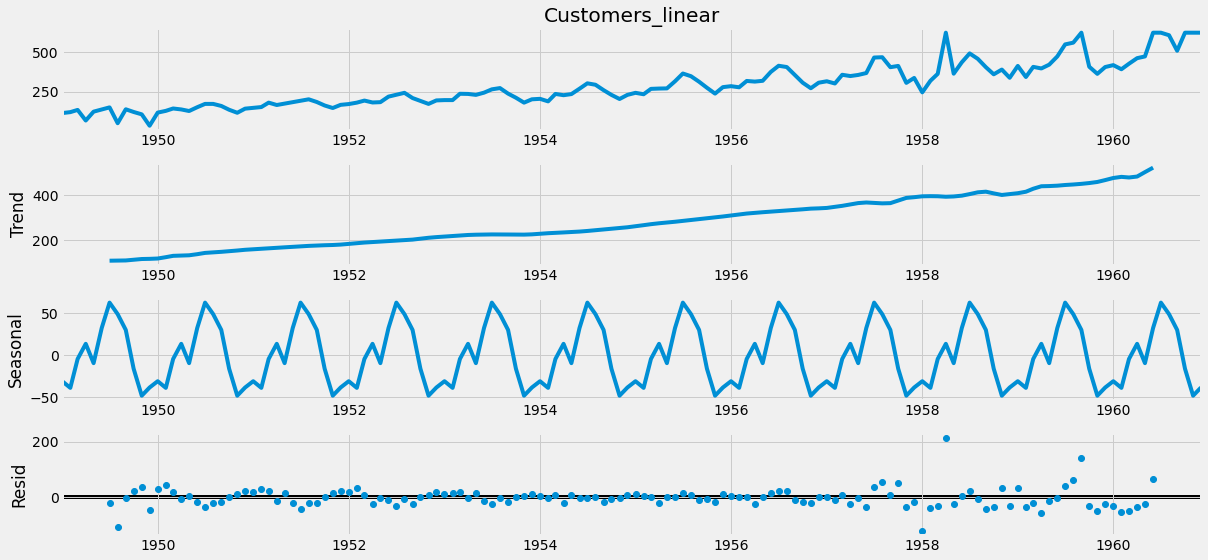

In [9]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

## Multiplicative Seasonal Decomposition
* Multiplicative Seasonal decompostion is when we multiply the individual component to get the time series data
* Y(t) = Leavel * Trend * Seasonality * Noise

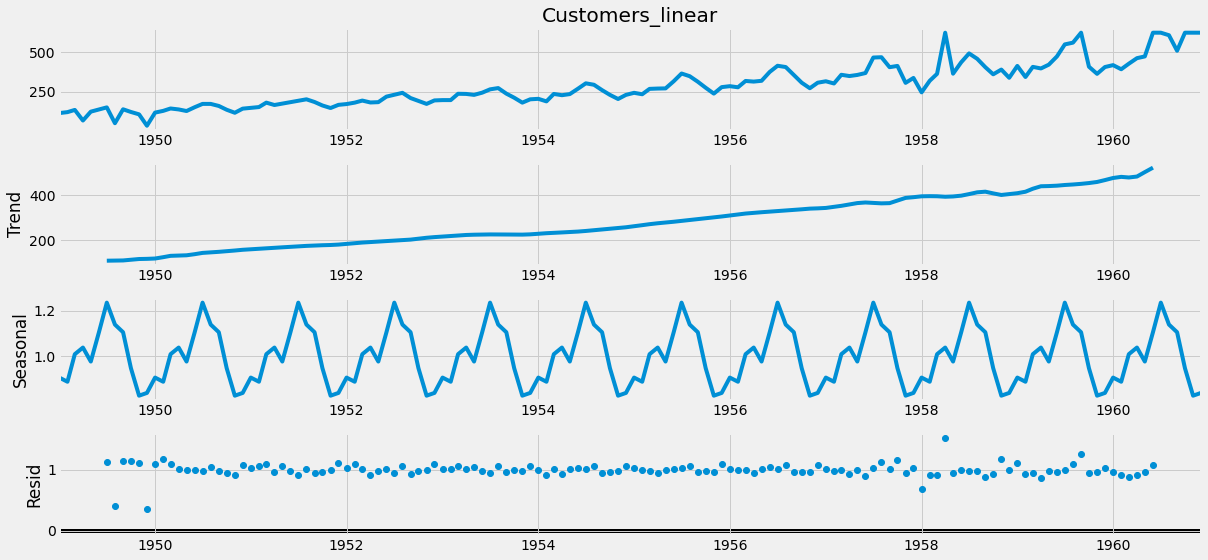

In [10]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

### Residual :
* Residual is the leftover part after extracting trend and seasonality from the time series
* First line represents " Original data "

* Which one we choose for our senario?vadditive vs Multiplicative Decomposition
* we use additive model,the magnitude of seasonality does not change in relation to time
* On the other hand we use multiplicative models when the magnitude of the seasonal pattren in the data depends on the magnitude of the data